# Pyabmm simulation for P2D Model with Asymmetric Charge Transfer Behavior at Cathode

### Load Packages

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from scipy import integrate

### Solver and Experiment Initilization

In [2]:
solver = pybamm.CasadiSolver()

In [3]:
experiment = pybamm.Experiment(
    [ 
        "Discharge at 1C for 1 hour",
        "Charge at 1C for 1 hour",
    ]
)

t_switch = 3600

## Simulation with Default Parameters

Discharge power for ε = -0.2: 2.4761 W.h
Efficiency for ε = -0.2: 94.4351 %
Discharge power for ε = -0.1: 2.4703 W.h
Efficiency for ε = -0.1: 94.8978 %
Discharge power for ε = 0: 2.4620 W.h
Efficiency for ε = 0: 94.9867 %
Discharge power for ε = 0.1: 2.4494 W.h
Efficiency for ε = 0.1: 94.7701 %
Discharge power for ε = 0.2: 2.4279 W.h
Efficiency for ε = 0.2: 94.1340 %


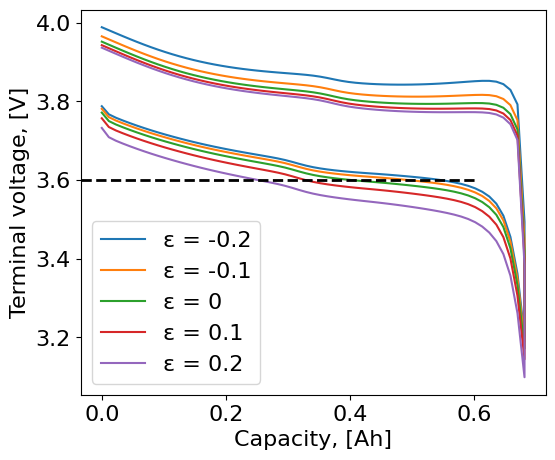

In [4]:
options = {"intercalation kinetics": "asymmetric Butler-Volmer"}
model = pybamm.lithium_ion.DFN(options=options)

parameter_values = model.default_parameter_values

parameter_values.update({"Negative electrode Butler-Volmer transfer coefficient": 0.5},check_already_exists=False)
parameter_values.update({"Positive electrode Butler-Volmer transfer coefficient": "[input]"},check_already_exists=False)


sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)

ε0 = [-0.2, -0.1, 0, 0.1, 0.2]

fig, ax = plt.subplots(figsize=(6, 5))
for i in range (len(ε0)):
    sol = sim.solve(inputs={"Positive electrode Butler-Volmer transfer coefficient": 0.5 + ε0[i]}, solver=solver)
    t_evals = sol["Time [s]"].entries
    
    plt.plot(sol['Discharge capacity [A.h]'](t_evals),sol['Terminal voltage [V]'](t_evals), label=f'ε = {ε0[i]}')
    discharge_power = integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals <= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals <= t_switch]))
    charge_power = abs(integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals >= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals >= t_switch])))
    print(f"Discharge power for ε = {ε0[i]}: {discharge_power:.4f} W.h")
    efficiency = (discharge_power / charge_power)*100
    print(f"Efficiency for ε = {ε0[i]}: {efficiency:.4f} %")
plt.axhline(y=3.6, xmax = 0.85, color='k', linestyle='--',lw =2)
plt.xlabel("Capacity, [Ah]")
plt.ylabel("Terminal voltage, [V]")
plt.legend()
plt.show()

## Simulation with Ai2020

Discharge power for ε = -0.2: 8.5096 W.h
Efficiency for ε = -0.2: 94.6165 %
Discharge power for ε = -0.1: 8.5057 W.h
Efficiency for ε = -0.1: 94.6583 %
Discharge power for ε = 0: 8.5007 W.h
Efficiency for ε = 0: 94.6650 %
Discharge power for ε = 0.1: 8.4942 W.h
Efficiency for ε = 0.1: 94.6401 %
Discharge power for ε = 0.2: 8.4849 W.h
Efficiency for ε = 0.2: 94.5756 %


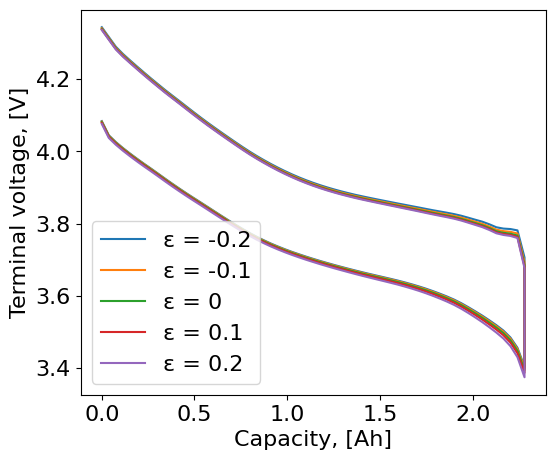

In [5]:
options = {"intercalation kinetics": "asymmetric Butler-Volmer"}
model = pybamm.lithium_ion.DFN(options=options)

parameter_values = pybamm.ParameterValues("Ai2020")

parameter_values.update({"Negative electrode Butler-Volmer transfer coefficient": 0.5},check_already_exists=False)
parameter_values.update({"Positive electrode Butler-Volmer transfer coefficient": "[input]"},check_already_exists=False)


sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)

ε0 = [-0.2, -0.1, 0, 0.1, 0.2]

fig, ax = plt.subplots(figsize=(6, 5))

for i in range (len(ε0)):
    sol = sim.solve(inputs={"Positive electrode Butler-Volmer transfer coefficient": 0.5 + ε0[i]},solver=solver)
    t_evals = sol["Time [s]"].entries
    
    plt.plot(sol['Discharge capacity [A.h]'](t_evals),sol['Terminal voltage [V]'](t_evals), label=f'ε = {ε0[i]}')
    discharge_power = integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals <= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals <= t_switch]))
    charge_power = abs(integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals >= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals >= t_switch])))
    print(f"Discharge power for ε = {ε0[i]}: {discharge_power:.4f} W.h")

    efficiency = (discharge_power / charge_power)*100
    print(f"Efficiency for ε = {ε0[i]}: {efficiency:.4f} %")

plt.xlabel("Capacity, [Ah]")
plt.ylabel("Terminal voltage, [V]")
plt.legend(loc = 'lower left')
plt.show()

## Simulation with Chen 2020

Discharge power for ε = -0.2: 17.4525 W.h
Efficiency for ε = -0.2: 87.6011 %
Discharge power for ε = -0.1: 17.4476 W.h
Efficiency for ε = -0.1: 87.5916 %
Discharge power for ε = 0: 17.4418 W.h
Efficiency for ε = 0: 87.5753 %
Discharge power for ε = 0.1: 17.4347 W.h
Efficiency for ε = 0.1: 87.5508 %
Discharge power for ε = 0.2: 17.4255 W.h
Efficiency for ε = 0.2: 87.5149 %


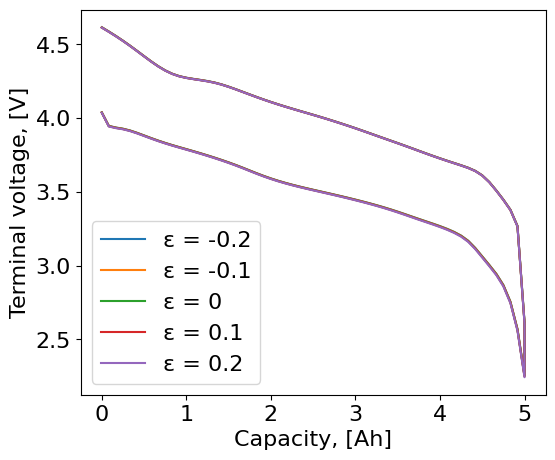

In [6]:
options = {"intercalation kinetics": "asymmetric Butler-Volmer"}
model = pybamm.lithium_ion.DFN(options=options)

parameter_values = pybamm.ParameterValues("Chen2020")

parameter_values.update({"Negative electrode Butler-Volmer transfer coefficient": 0.5},check_already_exists=False)
parameter_values.update({"Positive electrode Butler-Volmer transfer coefficient": "[input]"},check_already_exists=False)


sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)

ε0 = [-0.2, -0.1, 0, 0.1, 0.2]

fig, ax = plt.subplots(figsize=(6, 5))

for i in range (len(ε0)):
    sol = sim.solve(inputs={"Positive electrode Butler-Volmer transfer coefficient": 0.5 + ε0[i]}, solver=solver)
    t_evals = sol["Time [s]"].entries
    
    plt.plot(sol['Discharge capacity [A.h]'](t_evals),sol['Terminal voltage [V]'](t_evals), label=f'ε = {ε0[i]}')
    discharge_power = integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals <= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals <= t_switch]))
    charge_power = abs(integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals >= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals >= t_switch])))
    print(f"Discharge power for ε = {ε0[i]}: {discharge_power:.4f} W.h")   
    efficiency = (discharge_power / charge_power)*100
    print(f"Efficiency for ε = {ε0[i]}: {efficiency:.4f} %")

plt.xlabel("Capacity, [Ah]")
plt.ylabel("Terminal voltage, [V]")
plt.legend()
plt.show()

## Simulation with Chen 2020 for Aged Cathode

In [7]:
def nmc_exchange_current_density_Chen2020_artifical_aging(c_e, c_s_surf, c_s_max, T):
    """
    Exchange-current density for Butler-Volmer reactions between NMC and LiPF6 in
    EC:DMC.

    References
    ----------
    .. [1] Chang-Hui Chen, Ferran Brosa Planella, Kieran O’Regan, Dominika Gastol, W.
    Dhammika Widanage, and Emma Kendrick. "Development of Experimental Techniques for
    Parameterization of Multi-scale Lithium-ion Battery Models." Journal of the
    Electrochemical Society 167 (2020): 080534.

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Electrolyte concentration [mol.m-3]
    c_s_surf : :class:`pybamm.Symbol`
        Particle concentration [mol.m-3]
    c_s_max : :class:`pybamm.Symbol`
        Maximum particle concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Exchange-current density [A.m-2]
    """
    m_ref = 3.42e-7  # (A/m2)(m3/mol)**1.5 - includes ref concentrations
    E_r = 17800
    arrhenius = np.exp(E_r / pybamm.constants.R * (1 / 298.15 - 1 / T))

    return m_ref * arrhenius * c_e**0.5 * c_s_surf**0.5 * (c_s_max - c_s_surf) ** 0.5

Discharge power for ε = -0.2: 17.1610 W.h
Efficiency for ε = -0.2: 83.7003 %
Discharge power for ε = -0.1: 17.1035 W.h
Efficiency for ε = -0.1: 84.0640 %
Discharge power for ε = 0: 17.0220 W.h
Efficiency for ε = 0: 84.0459 %
Discharge power for ε = 0.1: 16.8981 W.h
Efficiency for ε = 0.1: 83.6870 %
Discharge power for ε = 0.2: 16.6891 W.h
Efficiency for ε = 0.2: 82.8327 %


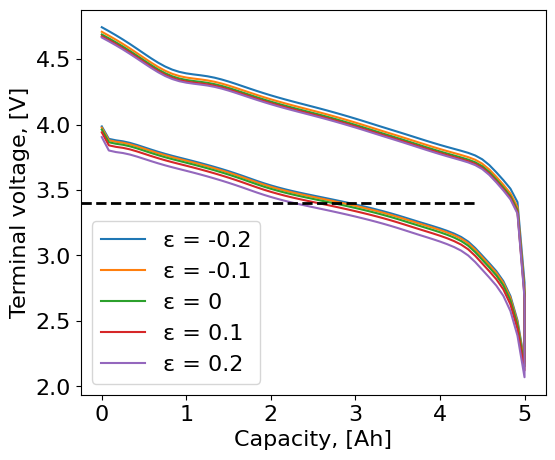

In [8]:

options = {"intercalation kinetics": "asymmetric Butler-Volmer"}
model = pybamm.lithium_ion.DFN(options=options)

parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values['Positive electrode exchange-current density [A.m-2]']= nmc_exchange_current_density_Chen2020_artifical_aging

parameter_values.update({"Negative electrode Butler-Volmer transfer coefficient": 0.5},check_already_exists=False)
parameter_values.update({"Positive electrode Butler-Volmer transfer coefficient": "[input]"},check_already_exists=False)


sim = pybamm.Simulation(model, parameter_values=parameter_values, experiment=experiment)

ε0 = [-0.2, -0.1, 0, 0.1, 0.2]

fig, ax = plt.subplots(figsize=(6, 5))

for i in range (len(ε0)):
    sol = sim.solve(inputs={"Positive electrode Butler-Volmer transfer coefficient": 0.5 + ε0[i]}, solver=solver)
    t_evals = sol["Time [s]"].entries
    
    plt.plot(sol['Discharge capacity [A.h]'](t_evals),sol['Terminal voltage [V]'](t_evals), label=f'ε = {ε0[i]}')
    discharge_power = integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals <= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals <= t_switch]))
    charge_power = abs(integrate.simpson(sol['Terminal voltage [V]'](t_evals[t_evals >= t_switch]), x=sol['Discharge capacity [A.h]'](t_evals[t_evals >= t_switch])))
    print(f"Discharge power for ε = {ε0[i]}: {discharge_power:.4f} W.h")   
    efficiency = (discharge_power / charge_power)*100
    print(f"Efficiency for ε = {ε0[i]}: {efficiency:.4f} %")
plt.axhline(y=3.4, xmax = 0.85, color='k', linestyle='--',lw =2)

plt.xlabel("Capacity, [Ah]")
plt.ylabel("Terminal voltage, [V]")
plt.legend()
plt.show()